#PCA
To get introduced to PCA and gain some intuition behind it, we will be applying dimensionality reduction to images. 
The principal component projections are defined such that each tries to capture as much variance of the original dataset (the first capturing the most, the second captures the next most variance, and so forth).

***See Bottom For More Background***

#####Example 1: Simple Feature Detection
We will be performing a similar analysis on the classic MNIST dataset of handwritten digits.

The MNIST dataset has digits stored as 28×28 pixel images. This means there are 784 features. We can use PCA to reduce the dimensions

#####Example 2: Regression
PCA can be used to get rid of redundant features. It removes the issue of multicollinearity among the feature space, and can be used to regress the dependent variable.

###Example 1: Handwritten Letters
#####1. Get the Dataset

In [ ]:
from sklearn import (cluster, datasets, decomposition, ensemble, lda, manifold, random_projection, preprocessing)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Top is the first six digits
digits = datasets.load_digits(n_class=6)
#this is all the digits they have
all_digits = datasets.load_digits()
%pylab inline

#####2. Look at the images:

In [ ]:
def show_images(digits, n=2):
    import pylab as pl
    pl.gray()
    fig = pl.figure(figsize=(n,n))
    for i in xrange(n):
        for j in xrange(n):
            pl.subplot(n, n, n * j + i + 1)
           pl.imshow(digits.images(digits.images[n * j + i]) 
            pl.xticks([])
            pl.yticks([])
            pl.axis('off')
    pl.show()
show_images(all_digits, 10)


#####3. SCALE the data! 

In [49]:
X_centered = preprocessing.scale(digits.data)

#####4. Transform the Data with PCA

In [50]:
pca = decomposition.PCA(n_components=10)
X_pca = pca.fit_transform(X_centered)

In [1]:
pl.imshow(X_pca)

NameError: name 'pl' is not defined

#####5. Use a Scree Plot to determine the ideal number of components. 
Similar to kmeans clustering to pick an appropriate value of k, here we need to pick an appropriate number of components to keep. 
Due to the loss of information in projecting data into lower dimensional space, our transformation is never perfect. One way we can determine how well it worked is to plot the amount of explained variance.
Looking at the plot of explained variance, we are interested in finding the 'elbow', the fewest principle components that explain the most variance. 

What is the optimal number of components to keep for the digits dataset?

In [51]:
def scree_plot(num_components, pca):
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35, 
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])
    for i in xrange(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind, 
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    plt.title("Scree Plot for the Digits Dataset", fontsize=16)
    plt.savefig("scree.png", dpi= 100)
X_centered = preprocessing.scale(digits.data)

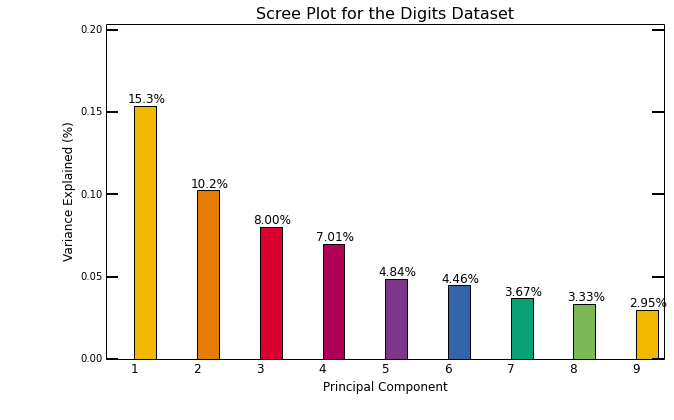

In [69]:
scree_plot(10, pca)

#The variance is called - eigenvalues, also called loadings

#####6. Alterative Way to Plot 2-D:
Another way to visualize our digits is to force a projection into 2-dimensional space in order to visualize the data on a 2-dimensional plane. The code snippet below will plot our digits projected into 2-dimensions on x-y axis.

In [7]:
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

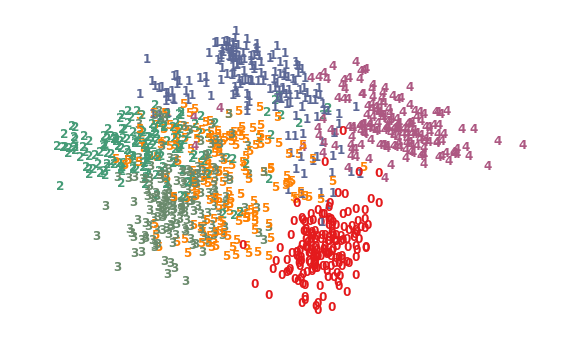

In [36]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
plot_embedding(X_pca, digits.target)

###Example 2: Regression

For this example, I will look at a car dataset, to regress mpg. 

Predict: mpg
Features: everything else

1. #### Simple cleaning of data first...

In [56]:
cars = pd.read_table('data/cars.tsv', header=None)
#Expand the first column containing an array of numbers to a new list with pandas' built-in functions with the command
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()), 
                    pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)
#Clean the data a little bit by removing any problematic rows or columns that are not numeric and only keep the first 8 columns.
car_df = new_df[new_df[3] != '?'].iloc[:,:8]
#Assign column names to your new data frame
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']
#Convert the numeric values to numeric datatype
float_df = car_df.convert_objects(convert_numeric=True)
#Split off mpg to use as the target variable with the other variables as features to predict mpg. Also, 'origin' is categorical, so either split off from feature dataframe or create dummy variables.

In [57]:
float_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18,8,307,130,3504,12.0,70,1
1,15,8,350,165,3693,11.5,70,1
2,18,8,318,150,3436,11.0,70,1
3,16,8,304,150,3433,12.0,70,1
4,17,8,302,140,3449,10.5,70,1


#####2. Set the x and y for the regression

In [76]:
multi_regress = float_df.copy()

y = multi_regress.pop('mpg')
y = y.reset_index(drop=True)

#####3. Compute the new matrix with reduced features by PCA

In [77]:
import statsmodels.api as sm

pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(preprocessing.scale(multi_regress.as_matrix()))

#####4. Run the Regression

In [78]:
features = pd.DataFrame(X_pca)

X = sm.add_constant(features)
X  =X.reset_index(drop=True)

est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     370.7
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          6.46e-131
Time:                        13:21:17   Log-Likelihood:                -1052.4
No. Observations:                 392   AIC:                             2115.
Df Residuals:                     387   BIC:                             2135.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.4459      0.180    130.067      0.000        23.092    23.800
0              3.0859      0.084     36.764      0.000         2.921     3.251
1              0.3901      0.186      2.098      0.037         0.025     0.756
2             -2.2701      0.209    -10.864      0.000        -2.681    -1.859
3             -0.7774      0.260     -2.992      0.003        -1.288    -0.267
==============================================================================
Omnibus:                       43.160   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.123
Skew:                           0.601   Prob(JB):                     1.63e-20
Kurtosis:                       5.034   Cond. No.                         3.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#####5. Compare with Regressing with All the Features:

In [66]:
import statsmodels.regression.linear_model as sml

multi_regress = float_df.copy()

y = multi_regress.pop('mpg')
features = multi_regress

X = sml.add_constant(features)
est = sml.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          2.04e-139
Time:                        10:18:27   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
model_year       0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
import statsmodels.formula.api as smf

est = smf.ols(formula="mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(model_year) + C(origin)", data=float_df).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Fri, 17 Jul 2015   Prob (F-statistic):          2.64e-151
Time:                        13:22:01   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              30.9168      2.361     13.095      0.000        26.274    35.559
C(cylinders)[T.4]       6.9399      1.537      4.516      0.000         3.918     9.962
C(cylinders)[T.5]       6.6377      2.337      2.840      0.005         2.042    11.234
C(cylinders)[T.6]       4.2973      1.706      2.519      0.012         0.943     7.652
C(cylinders)[T.8]       6.3668      1.969      3.234      0.001         2.495    10.238
C(model_year)[T.71]     0.9104      0.816      1.116      0.265        -0.693     2.514
C(model_year)[T.72]    -0.4903      0.804     -0.610      0.542        -2.071     1.090
C(model_year)[T.73]    -0.5529      0.721     -0.766      0.444        -1.972     0.866
C(model_year)[T.74]     1.2420      0.855      1.453      0.147        -0.439     2.923
C(model_year)[T.75]     0.8704      0.837      1.039      0.299        -0.776     2.517
C(model_year)[T.76]     1.4967      0.802      1.866      0.063        -0.080     3.074
C(model_year)[T.77]     2.9987      0.820      3.657      0.000         1.386     4.611
C(model_year)[T.78]     2.9738      0.779      3.816      0.000         1.442     4.506
C(model_year)[T.79]     4.8962      0.825      5.936      0.000         3.274     6.518
C(model_year)[T.80]     9.0589      0.875     10.351      0.000         7.338    10.780
C(model_year)[T.81]     6.4582      0.864      7.477      0.000         4.760     8.157
C(model_year)[T.82]     7.8376      0.849      9.228      0.000         6.167     9.508
C(origin)[T.2]          1.6933      0.516      3.280      0.001         0.678     2.708
C(origin)[T.3]          2.2929      0.497      4.616      0.000         1.316     3.270
displacement            0.0118      0.007      1.745      0.082        -0.001     0.025
horsepower             -0.0392      0.013     -3.010      0.003        -0.065    -0.014
weight                 -0.0052      0.001     -8.300      0.000        -0.006    -0.004
acceleration            0.0036      0.087      0.042      0.967        -0.167     0.174
==============================================================================
Omnibus:                       32.560   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.829
Skew:                           0.528   Prob(JB):                     7.53e-13
Kurtosis:                       4.518   Cond. No.                     7.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'While PCA does not increase our R-squared or Adjusted-R-squared, it does make a model that is potentially more generalizable. I haven't run a cross validation test on this model, but you may see better performance on unseen data after having first performed Dimensionality Reduction. Also there is comparable performance of PCA reduced to 4 features and with the model using all the original 7.'

#PCA: More Background
######From Zipfian Lecture Notes
Usually we will get a covariance matrix with a lot of large values. Our ideal would be one where all the non-diagonal values are 0. This means that there is *no relationship between the features*. We can do a transformation of this data to make this happen!

The ideal convariance matrix would look something like this:

$\begin{bmatrix}
10 & 0 & 0 \\
0  & 8 & 0 \\
0  & 0 & 2
\end{bmatrix}$

The idea is to find a new set of axis (a *basis*) that better fit the data.

#####Our goal is to find a transformation matrix $V$ which when applied to $M$ gives us our ideal covariance matrix:

$M^TMV = V\Lambda$

where $\Lambda$ is the diagonal matrix of eigenvalues.

$(MV)^T (MV) = V^TM^TMV =
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}$

To get the transformation, we need to find the eigenvalues and eigenvectors of M^TM. 
  - The eigenvectors are the new basis. 
  - The eigenvalues are the variance in each of these dimensions.


$V$ is the new basis so it should look like this:

$V =
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}$

Note that the $u_1, u_2, \ldots, u_p$ is an *orthonormal* basis.

*orthonormal* means:
1. Vectors are normal (perpendicular) with each other. This means their dot products are 0.
2. Vectors have norm 1. This means the dot product with itself is 1.

So the following is true:

$\begin{align*}
V^TV 
&=
\begin{bmatrix}
- & u_1 & - \\
- & u_2 & - \\
- & u_3 & - \\
- & \vdots & - \\
- & u_p & -
\end{bmatrix}
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix} \\
&=
\begin{bmatrix}
u_1 \cdot u_1 & u_1 \cdot u_2 & \cdots & u_1 \cdot u_p \\
u_2 \cdot u_1 & u_2 \cdot u_2 & \cdots & u_2 \cdot u_p \\
\vdots & \vdots & \ddots & \vdots \\
u_p \cdot u_1 & u_p \cdot u_2 & \cdots & u_p \cdot u_p
\end{bmatrix} \\
&=
\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & 1
\end{bmatrix}
\end{align*}$

So $V^TV$ is the identity matrix!

Back to the original equation of our ideal world:

$\begin{align*}
V^TM^TMV &=
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\\
M^TMV &= V
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix} \\
&=
\begin{bmatrix}
\mid & \mid & \mid & \cdots & \mid \\
u_1 & u_2 & u_3 & \cdots & u_p \\
\mid & \mid & \mid & \cdots & \mid
\end{bmatrix}
\begin{bmatrix}
\lambda_1 & 0 & 0 & \ldots & 0 \\
0 & \lambda_2 & 0 & \ldots & 0 \\
0 & 0 & \lambda_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \lambda_p
\end{bmatrix}
\end{align*}$

Taking just one of these vectors out, we get:

$M^TMu_i = \lambda_iu_i$

So we are looking for the ***eigenvalues*** ($\lambda_i$) and ***eigenvectors*** ($u_i$).

#####If we would like to reduce the number of dimensions, we can just get rid of the smallest of the lambdas. To determine how many to keep, we often look at the scree plot, a plot of the variances (eigenvalues, also called loadings) in increasing order.